##  CNN : Merged Dataset (original + bert augmented + RTT augmented)

In [1]:
# COLAB
from google.colab import files
from google.colab import drive
# SYS
import sys
# IPYNB
!pip install import-ipynb
import import_ipynb
# UTIL
import importlib.util

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=bed0451d672c187ea46587028b4321da7852720a97e77e05e0279695f58b1bad
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [2]:
import pandas as pd
import re
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation , Flatten
from sklearn.preprocessing import LabelEncoder
from keras import utils as np_utils
from tensorflow.keras.layers import Dropout,Embedding , BatchNormalization
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
import xgboost as xgb 
import sklearn.metrics as metrics

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 1. Loading preprocessing class

In [4]:
#https://stackoverflow.com/questions/62117483/import-module-in-google-colab-from-google-drive-python
sys.path.append('/content/gdrive/MyDrive/CS--2/')
from module_2_preprocessing import Data_Preprocessing

Uninstalling nltk-3.2.5:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/nltk-3.2.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/nltk/*
Proceed (y/n)? y
  Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 1.4MB 4.1MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434677 sha256=269c937f7c12038ab747b0e6703a51a33949e60e72e50d457638bfd6d4c70a63
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


{"you'll", 'himself', 'hadn', 'we', 'should', 'what', 'yourselves', 'ourselves', 'these', "isn't", 'our', 'that', 'than', 'myself', 'does', 'after', 'wouldn', 'with', 'has', 'will', 'against', 'off', 'me', 'have', 'too', 'but', 'ma', 'can', 'doing', 'she', 'be', 'don', 'ain', 'needn', "hadn't", 's', 'above', 'no', 'under', 'doesn', 'my', 'why', 'again', "don't", "should've", 'd', 'hasn', 'had', 'only', "it's", 'themselves', "you've", 'at', 'not', 'm', 'shouldn', 'o', 'about', "needn't", 'all', 'because', 'did', 'am', "didn't", "shan't", "mightn't", 'how', 'both', 'or', 'i', 'up', "that'll", 'until', 'over', 'of', 'll', 'which', 'wasn', 'couldn', 'while', 'by', 'such', 'aren', "couldn't", 'being', 'now', 't', 'were', 'as', 'most', "you're", 'a', 'here', 'some', 'own', "she's", 'mightn', 'once', 'whom', 'in', 'they', "haven't", 'yours', 'so', 'didn', "shouldn't", 'through', 'more', 'weren', 'his', 'her', 'if', 'this', 'who', 'yourself', 'those', 'was', 'you', 'him', 'each', 'nor', "hasn'

In [5]:
data_1 = pd.read_csv("/content/gdrive/MyDrive/CS--2/restaurant_train_data_semeval_14.csv")
data_2 = pd.read_csv("/content/gdrive/MyDrive/CS--2/augmented_data_restaurant.csv")
data_3 = pd.read_csv("/content/gdrive/MyDrive/CS--2/augmented_data_restaurant_bert.csv")
restaurant_data = pd.concat([data_1 , data_2 , data_3])

In [6]:
restaurant_data.shape

(15220, 5)

In [7]:
restaurant_data.head()

,id,text,aspect_term,aspect_category,polarity
0,3121.0,but the staff was so horrible to us.,staff,service,negative
1,2777.0,"to be completely fair, the only redeeming fact...",food,anecdotes/miscellaneous,negative
2,1634.0,"the food is uniformly exceptional, with a very...",menu,food,positive
3,2534.0,where gabriela personaly greets you and recomm...,NaN,service,positive
4,583.0,"for those that go once and don't enjoy it, all...",NaN,anecdotes/miscellaneous,positive


In [8]:
restaurant_data.groupby('aspect_category').size().sort_values(ascending=False)

aspect_category
anecdotes/miscellaneous    5242
food                       4315
service                    2298
ambience                   1944
price                      1421
dtype: int64

In [9]:
catagories = restaurant_data['aspect_category'].unique()
catagories , len(catagories)

(array(['service', 'anecdotes/miscellaneous', 'food', 'price', 'ambience'],
       dtype=object), 5)

In [ ]:
# Aspect Based Sentiment Analysis

In [10]:
X = restaurant_data['text']
Y = restaurant_data['aspect_category']

In [ ]:
# 3. Splitting the data 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12176,) (12176,)
(3044,) (3044,)


In [14]:
dp = Data_Preprocessing()

In [15]:
X_train_review = dp.preprocess_text(X_train)

100%|██████████| 12176/12176 [00:06<00:00, 1847.25it/s]


In [16]:
X_test_review = dp.preprocess_text(X_test)

100%|██████████| 3044/3044 [00:01<00:00, 2442.80it/s]


In [17]:
from keras.preprocessing.text import Tokenizer

vocab_size = 6000 # We set a maximum size for the vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_train_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(X_train_review))
X_test_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(X_test_review))

In [18]:
label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(y_train)
encoded_y_train = np_utils.to_categorical(integer_category)

integer_category = label_encoder.fit_transform(y_test)
encoded_y_test = np_utils.to_categorical(integer_category)

In [19]:
acbsa_model = Sequential()                                                   
acbsa_model.add(Dense(512, input_shape=(6000,), activation='relu'))
#acbsa_model.add((BatchNormalization()))
acbsa_model.add((Dense(256, activation='relu')))
acbsa_model.add((Dropout(0.3)))
acbsa_model.add((Dense(128, activation='relu')))
#acbsa_model.add((Dropout(0.1)))
#acbsa_model.add((Dense(64, activation='relu')))
acbsa_model.add(Dense(5, activation='softmax'))
#compile model
acbsa_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [20]:
acbsa_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               3072512   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 3,237,381
Trainable params: 3,237,381
Non-trainable params: 0
_________________________________________________________________


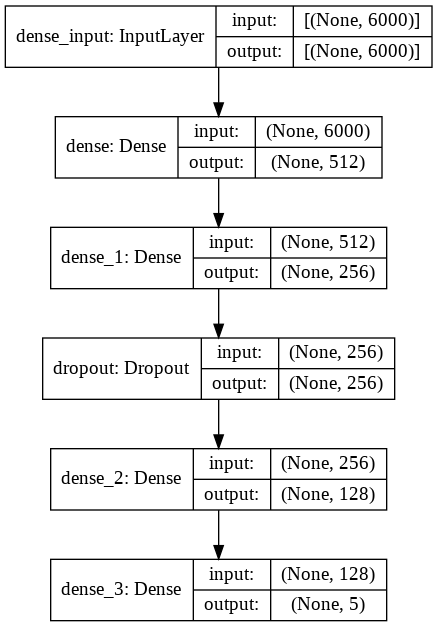

In [21]:
plot_model(acbsa_model, 'model_1.png',show_shapes=True)

In [22]:
#fit aspect classifier
history = acbsa_model.fit(X_train_tokenized , encoded_y_train , validation_data=(X_test_tokenized ,encoded_y_test) , epochs= 5, verbose=1)

Epoch 1/5
381/381 [==============================] - 11s 26ms/step - loss: 0.8742 - accuracy: 0.6666 - val_loss: 0.0915 - val_accuracy: 0.9714
Epoch 2/5
381/381 [==============================] - 9s 25ms/step - loss: 0.0277 - accuracy: 0.9921 - val_loss: 0.0386 - val_accuracy: 0.9888
Epoch 3/5
381/381 [==============================] - 9s 25ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0355 - val_accuracy: 0.9918
Epoch 4/5
381/381 [==============================] - 9s 25ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0293 - val_accuracy: 0.9924
Epoch 5/5
381/381 [==============================] - 9s 25ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0284 - val_accuracy: 0.9924


In [23]:
predicted_cat = label_encoder.inverse_transform(acbsa_model.predict_classes(X_test_tokenized))
#print(new_polarity)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
predicted_cat[0:10]

array(['ambience', 'service', 'anecdotes/miscellaneous', 'service',
       'ambience', 'anecdotes/miscellaneous', 'anecdotes/miscellaneous',
       'anecdotes/miscellaneous', 'ambience', 'service'], dtype=object)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_cat ,target_names=catagories))

                         precision    recall  f1-score   support

                service       0.99      0.99      0.99       393
anecdotes/miscellaneous       0.99      0.99      0.99      1058
                   food       1.00      0.99      1.00       847
                  price       0.99      0.98      0.99       299
               ambience       1.00      0.99      0.99       447

               accuracy                           0.99      3044
              macro avg       0.99      0.99      0.99      3044
           weighted avg       0.99      0.99      0.99      3044



In [26]:
#Observation : This is the classification report of aspect category based sentiment model showing the orecision, recall, f1_score and support values for all 5 unique catagories with accuracy 60 percent 

In [27]:
import matplotlib.pyplot as plt
def plot_accuracy(history, miny=None):
  acc = history.history['accuracy']
  test_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy') 
  plt.xlabel('epoch')
  plt.figure()

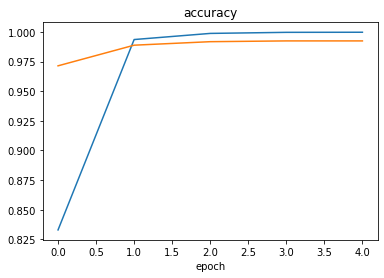

<Figure size 432x288 with 0 Axes>

In [28]:
plot_accuracy(history)

In [29]:
#7. Confusion matrix Representation

In [30]:
# code borrowed from Microsoft Malware Detection Assignment
def plot_confusion_matrix(test_y, predict_y ,labels):
    C = confusion_matrix(test_y, predict_y)      # calculation of confusion matrix 
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y))    # number of misclassified points while predicting y
 
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))

    labels = labels                 
    cmap=sns.light_palette("purple")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    # representing B in heatmap format
    print("-"*50, "Recall matrix" , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

Number of misclassified points  0.0075558475689881735
-------------------------------------------------- Confusion matrix --------------------------------------------------


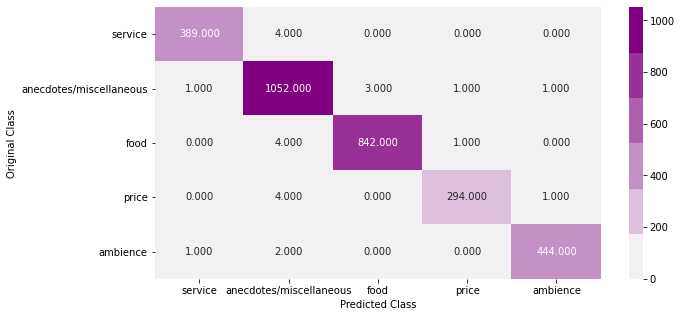

-------------------------------------------------- Precision matrix --------------------------------------------------


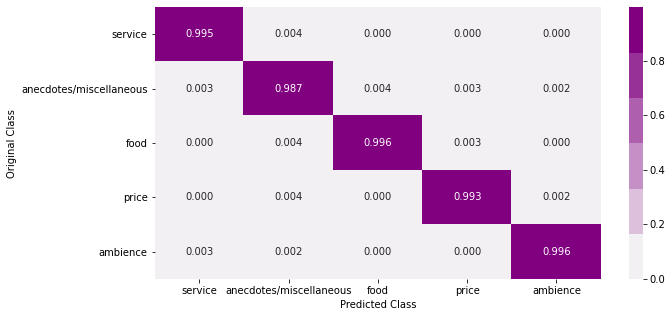

Sum of columns in precision matrix [1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


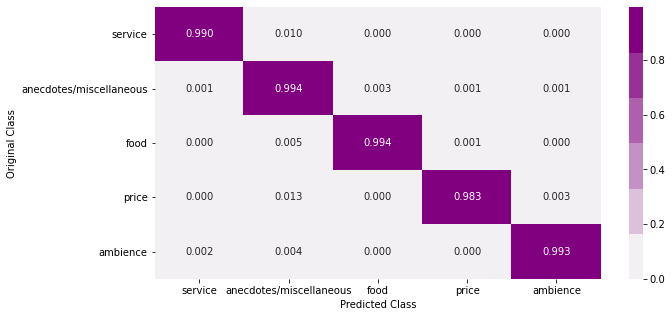

Sum of rows in precision matrix [1. 1. 1. 1. 1.]


In [31]:
plot_confusion_matrix(y_test,  predicted_cat, catagories)

In [32]:
# 7.sentiment model

In [33]:
X = restaurant_data['text']
Y = restaurant_data['polarity']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12176,) (12176,)
(3044,) (3044,)


In [36]:
label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(y_train)
encoded_y_train = np_utils.to_categorical(integer_category)

integer_category = label_encoder.fit_transform(y_test)
encoded_y_test = np_utils.to_categorical(integer_category)

In [51]:
sentiment_model = Sequential()
sentiment_model.add(Dense(512, input_shape=(6000,), activation='relu'))
sentiment_model.add((Dense(256, activation='relu')))
sentiment_model.add((Dropout(0.3)))
sentiment_model.add((Dense(128, activation='relu')))
sentiment_model.add(Dense(4, activation='softmax'))
sentiment_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
sentiment_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               3072512   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 3,237,252
Trainable params: 3,237,252
Non-trainable params: 0
_________________________________________________________________


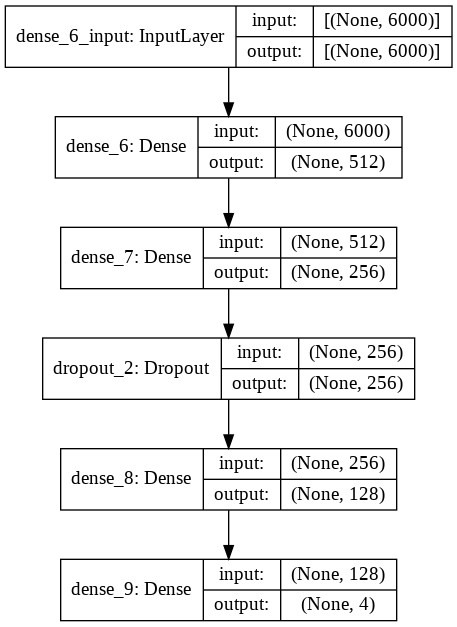

In [53]:
plot_model(sentiment_model, 'model_2.png',show_shapes=True)

In [54]:
#fit aspect classifier
history = sentiment_model.fit(X_train_tokenized , encoded_y_train , validation_data=(X_test_tokenized ,encoded_y_test) , epochs=6, verbose=1)

Epoch 1/6
381/381 [==============================] - 10s 25ms/step - loss: 0.7739 - accuracy: 0.6983 - val_loss: 0.1027 - val_accuracy: 0.9658
Epoch 2/6
381/381 [==============================] - 9s 25ms/step - loss: 0.0374 - accuracy: 0.9889 - val_loss: 0.0389 - val_accuracy: 0.9898
Epoch 3/6
381/381 [==============================] - 9s 25ms/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0357 - val_accuracy: 0.9924
Epoch 4/6
381/381 [==============================] - 9s 25ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0337 - val_accuracy: 0.9928
Epoch 5/6
381/381 [==============================] - 9s 25ms/step - loss: 6.5540e-04 - accuracy: 0.9998 - val_loss: 0.0344 - val_accuracy: 0.9924
Epoch 6/6
381/381 [==============================] - 9s 25ms/step - loss: 3.8814e-04 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 0.9915


In [55]:
predicted_polarity = label_encoder.inverse_transform(sentiment_model.predict_classes(X_test_tokenized))
#print(new_polarity)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [56]:
predicted_polarity[0:10]

array(['negative', 'positive', 'neutral', 'positive', 'positive',
       'negative', 'positive', 'neutral', 'negative', 'positive'],
      dtype=object)

In [57]:
polarity = restaurant_data["polarity"].unique()
polarity

array(['negative', 'positive', 'neutral', 'conflict'], dtype=object)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_polarity ,target_names= polarity))

              precision    recall  f1-score   support

    negative       0.98      0.98      0.98       161
    positive       0.99      0.99      0.99       696
     neutral       1.00      0.97      0.98       486
    conflict       0.99      1.00      1.00      1701

    accuracy                           0.99      3044
   macro avg       0.99      0.98      0.99      3044
weighted avg       0.99      0.99      0.99      3044



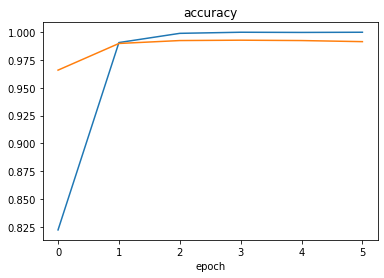

<Figure size 432x288 with 0 Axes>

In [59]:
plot_accuracy(history)

Number of misclassified points  0.008541392904073587
-------------------------------------------------- Confusion matrix --------------------------------------------------


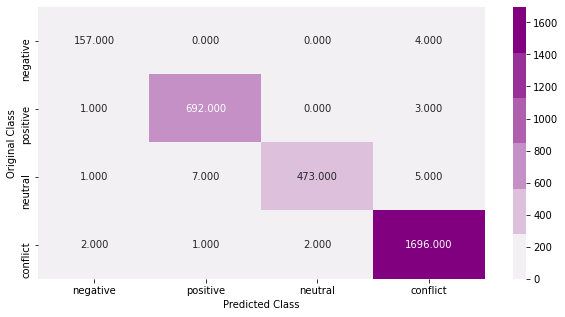

-------------------------------------------------- Precision matrix --------------------------------------------------


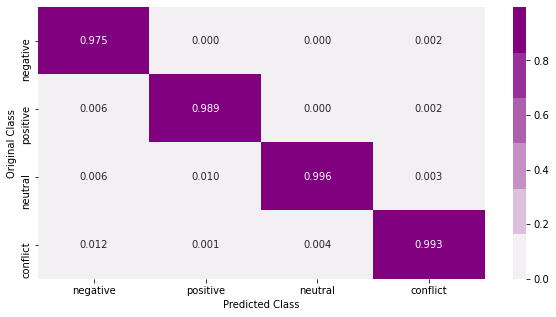

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


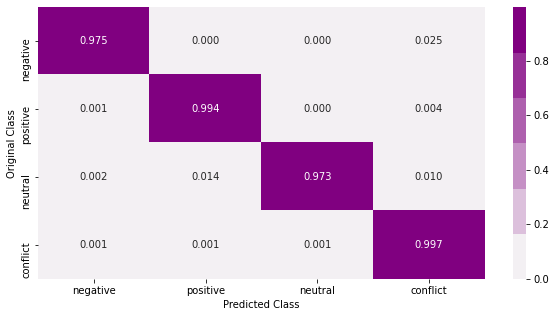

Sum of rows in precision matrix [1. 1. 1. 1.]


In [60]:
plot_confusion_matrix(y_test,  predicted_polarity, polarity)

In [61]:
#8. creating a resultant dataframe

In [62]:
def create_result_dataframe(pred_1,pred_2):
  # Calling DataFrame constructor on predicted outputs
  resultant_df = pd.DataFrame(list(zip(pred_1,pred_2)), columns = ["predicted_catagories" , "predicted_polarity"])
  result  = pd.crosstab(resultant_df.predicted_catagories,resultant_df.predicted_polarity ,margins = True , margins_name = "Total")
  result["Ranking"] = ( result.Total/resultant_df.shape[0]) * 5.0 
  result["Negative in %"] = (result.negative/result.Total) * 100
  result["Neutral in %"] = (result.neutral/result.Total) * 100
  result["Positive in %"] = (result.positive/result.Total) * 100
  result["conflict in %"] = (result.conflict/result.Total) * 100
  del result["negative"]
  del result["neutral"]
  del result["positive"]
  del result["Total"]
  del result["conflict"]

  return result


In [63]:
result = create_result_dataframe(predicted_cat,predicted_polarity)

In [64]:
result

predicted_polarity,Ranking,Negative in %,Neutral in %,Positive in %,conflict in %
predicted_catagories,,,,,
ambience,0.642247,17.647059,8.184143,63.938619,10.230179
anecdotes/miscellaneous,1.750986,17.636023,31.894934,48.592871,1.876173
food,1.387976,18.343195,8.994083,66.390533,6.272189
price,0.486202,38.513514,3.378378,52.364865,5.743243
service,0.732589,39.013453,3.811659,50.224215,6.950673
Total,5.000000,22.996058,15.604468,56.110381,5.289093


### Observation :
   Above result shows that the Ranking and all Polarities in percentages for all aspect catagories from which we can see that anecdotes/miscellaneous have the highest ranking of 1.75 and food catagory have highest positive polarity